In [1]:
import keras
import numpy
import matplotlib.pyplot as plotter
import PIL
import json
import time
import tensorflow

In [2]:
def load_density_count(count, density_map, count_labels, density_folder):
    
    for i in range(count):
        name_str = str(i + 1).zfill(4)
        density_map[i,:,:,0] = numpy.loadtxt(density_folder + "/" + name_str + ".txt")
        
        data = None
        
        with open("Json/" + name_str + ".json") as f:
            data = json.load(f)
        
        count_labels[i] = data["human_num"]
        
        if i % 200 == 0:
            print(i, " images loaded so far!")

In [3]:
# Change the density folder and the weight saving file
weights_saving_file = "2k_counting_weights.h5"
density_folder = "Density_2K"

count = 3609
density_map = numpy.full((count, 224, 224, 1), 0)
count_labels = numpy.full((count, 1), 0)

load_density_count(count, density_map, count_labels, density_folder)

0  images loaded so far!
200  images loaded so far!
400  images loaded so far!
600  images loaded so far!
800  images loaded so far!
1000  images loaded so far!
1200  images loaded so far!
1400  images loaded so far!
1600  images loaded so far!
1800  images loaded so far!
2000  images loaded so far!
2200  images loaded so far!
2400  images loaded so far!
2600  images loaded so far!
2800  images loaded so far!
3000  images loaded so far!
3200  images loaded so far!
3400  images loaded so far!
3600  images loaded so far!


Count:  [3245]


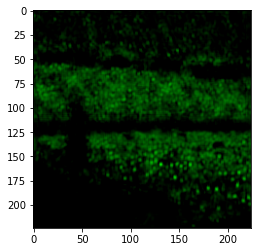

In [11]:
# Create the density map
density = numpy.full((224, 224, 3), 0)

density[:,:,1] = density_map[256][:,:,0]

plotter.imshow(density)

print("Count: ", count_labels[256])

In [5]:
model = keras.Sequential()

model.add(keras.layers.Input((224, 224, 1)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(4028, activation="relu"))
model.add(keras.layers.Dense(4028, activation="relu"))
model.add(keras.layers.Dense(4028, activation="relu"))
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 4028)              202112956 
_________________________________________________________________
dense_1 (Dense)              (None, 4028)              16228812  
_________________________________________________________________
dense_2 (Dense)              (None, 4028)              16228812  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4029      
Total params: 234,574,609
Trainable params: 234,574,609
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer="Adam", loss="mse", metrics=[keras.metrics.RootMeanSquaredError()])

In [7]:
my_callbacks = [keras.callbacks.ModelCheckpoint(weights_saving_file, monitor="val_loss", save_best_only=False)]

history = model.fit(density_map, count_labels, batch_size=100, epochs=50, validation_split=0.2, callbacks=my_callbacks)

Epoch 1/50
29/29 [==============================] - 39s 1s/step - loss: 142259376.0000 - root_mean_squared_error: 11927.2539 - val_loss: 1138209.7500 - val_root_mean_squared_error: 1066.8691
Epoch 2/50
29/29 [==============================] - 42s 1s/step - loss: 761205.3750 - root_mean_squared_error: 872.4709 - val_loss: 1163023.7500 - val_root_mean_squared_error: 1078.4358
Epoch 3/50
29/29 [==============================] - 37s 1s/step - loss: 834123.3125 - root_mean_squared_error: 913.3035 - val_loss: 1145805.2500 - val_root_mean_squared_error: 1070.4230
Epoch 4/50
29/29 [==============================] - 38s 1s/step - loss: 762035.1250 - root_mean_squared_error: 872.9462 - val_loss: 1135904.6250 - val_root_mean_squared_error: 1065.7882
Epoch 5/50
29/29 [==============================] - 37s 1s/step - loss: 748605.3750 - root_mean_squared_error: 865.2198 - val_loss: 1105218.3750 - val_root_mean_squared_error: 1051.2937
Epoch 6/50
29/29 [==============================] - 37s 1s/step -

Epoch 45/50
29/29 [==============================] - 39s 1s/step - loss: 9078.0088 - root_mean_squared_error: 95.2786 - val_loss: 1203311.3750 - val_root_mean_squared_error: 1096.9554
Epoch 46/50
29/29 [==============================] - 39s 1s/step - loss: 11683.8086 - root_mean_squared_error: 108.0917 - val_loss: 1194724.3750 - val_root_mean_squared_error: 1093.0344
Epoch 47/50
29/29 [==============================] - 38s 1s/step - loss: 14080.2607 - root_mean_squared_error: 118.6603 - val_loss: 1206251.0000 - val_root_mean_squared_error: 1098.2946
Epoch 48/50
29/29 [==============================] - 40s 1s/step - loss: 13696.8184 - root_mean_squared_error: 117.0334 - val_loss: 1200757.5000 - val_root_mean_squared_error: 1095.7908
Epoch 49/50
29/29 [==============================] - 38s 1s/step - loss: 10272.7451 - root_mean_squared_error: 101.3546 - val_loss: 1213098.7500 - val_root_mean_squared_error: 1101.4077
Epoch 50/50
29/29 [==============================] - 39s 1s/step - loss:

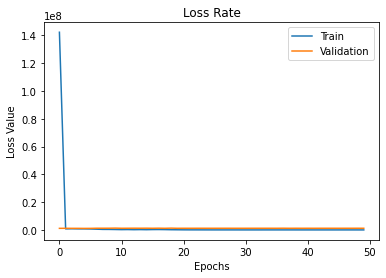

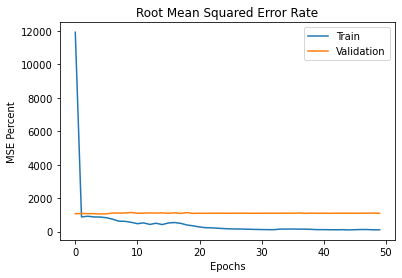

In [8]:
# Plot the loss value
plotter.plot(history.history["loss"])
plotter.plot(history.history["val_loss"])
plotter.ylabel("Loss Value")
plotter.xlabel("Epochs")
plotter.legend(["Train", "Validation"])
plotter.title("Loss Rate")
plotter.show()

# Plot the mse value
plotter.plot(history.history["root_mean_squared_error"])
plotter.plot(history.history["val_root_mean_squared_error"])
plotter.ylabel("MSE Percent")
plotter.xlabel("Epochs")
plotter.legend(["Train", "Validation"])
plotter.title("Root Mean Squared Error Rate")
plotter.show()

In [12]:
result = model.predict(density_map[256:257])

In [13]:
print("Predicted: ", result[0,0])

Predicted:  3137.9211
